# Import necessary libraries

In [1]:
library("tidyverse")
library("DataExplorer")
library("ggplot2")
library("ggridges")
library("corrplot")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded



# Distinguish Attributes

In [2]:
enron = read.csv("/kaggle/input/newrecords/new_records.csv")
print("Summary of ENRON:")
enron = subset(enron, enron$X != "TOTAL") 
summary(enron)

[1] "Summary of ENRON:"


       X             salary          to_messages      deferral_payments 
 Min.   :  0.0   Min.   :     477   Min.   :   57.0   Min.   : -102500  
 1st Qu.:127.2   1st Qu.:  215706   1st Qu.:  774.5   1st Qu.:   85430  
 Median :254.5   Median :  260532   Median : 1549.0   Median :  502768  
 Mean   :254.5   Mean   :  720782   Mean   : 2048.1   Mean   : 2005277  
 3rd Qu.:381.8   3rd Qu.:  312028   3rd Qu.: 2631.8   3rd Qu.: 1174201  
 Max.   :509.0   Max.   :26704229   Max.   :15149.0   Max.   :32083396  
                 NA's   :34         NA's   :48        NA's   :202       
 total_payments      loan_advances          bonus         
 Min.   :     1150   Min.   :  400000   Min.   :   70000  
 1st Qu.:   771653   1st Qu.: 2000000   1st Qu.:  550000  
 Median :  1421277   Median :81525000   Median :  800000  
 Mean   :  6245678   Mean   :47096684   Mean   : 2930727  
 3rd Qu.:  2354068   3rd Qu.:83925000   3rd Qu.: 1546875  
 Max.   :155817054   Max.   :83925000   Max.   :97343619  
 NA

## Analysis
As we can see that the numerous missing data make it difficult to calculate standard deviation, we then transform NAs into number 0.

Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”
Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”


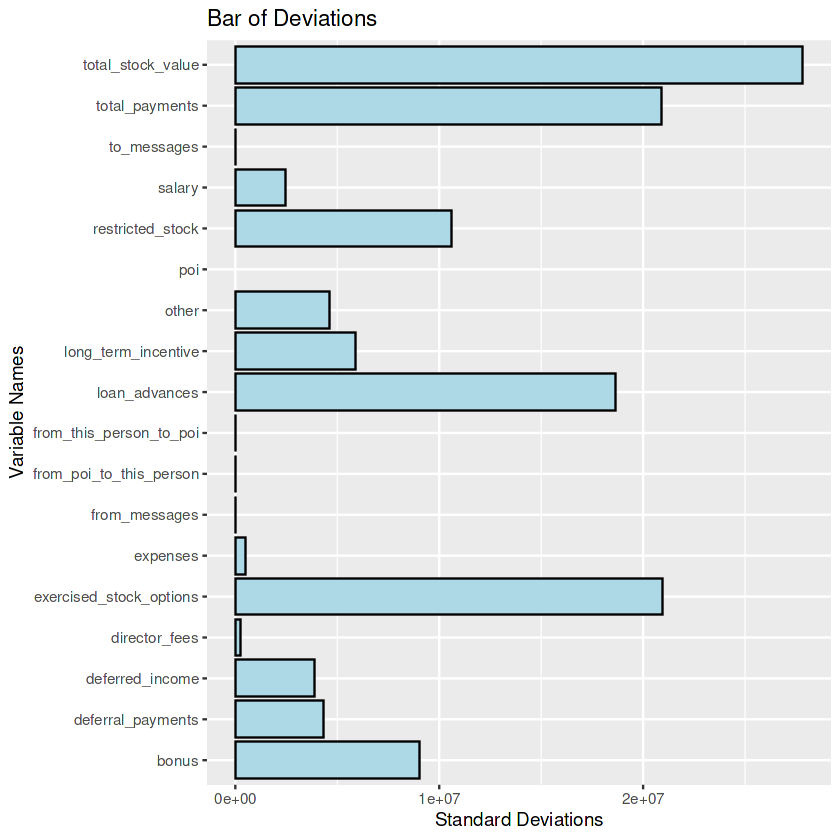

In [3]:
enron[is.na(enron)] = 0

enron_sd_value = select(enron,-c(1,8,18)) %>%
            apply(2,sd) 
enron_sd_name = select(enron,-c(1,8,18)) %>%
            colnames()
enron_sd = data.frame(value = enron_sd_value,
                      name  = enron_sd_name)

ggplot(enron_sd, aes(y = name,x = value))+
    geom_bar(stat = 'identity',
             fill = "lightblue", 
             color = "black", 
             position = position_dodge(0.9)) +
    labs(x = "Standard Deviations", y = "Variable Names", title = "Bar of Deviations")


# Univariate Analysis
In this section, I would like to take 3 variables, namely salary, exercised stock options, and bonus, into consideration. I will give my reasons in the following paragraphs.

Firstly, I assume that salary relates to people's rank in their company since a higher position means a higher salary in most cases.

Based on the assumption above, I may further infer that it should present a relatively falling trend of exercised stock options as the salary data goes up. Leaders of the company should exercise their stock options as little as possible since it is wise for them to keep their stock options as long as they can if they feel confident about the company's development under most circumstances.

Lastly, bonus data should not be too high compared with the value of its corresponding salary data from my perspective.

Additionally, the standard deviations of these 3 variables are relatively higher than those of others according to the previous section, which is also suspective. Hence, I choose them to do univariate analysis.



## Salary

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


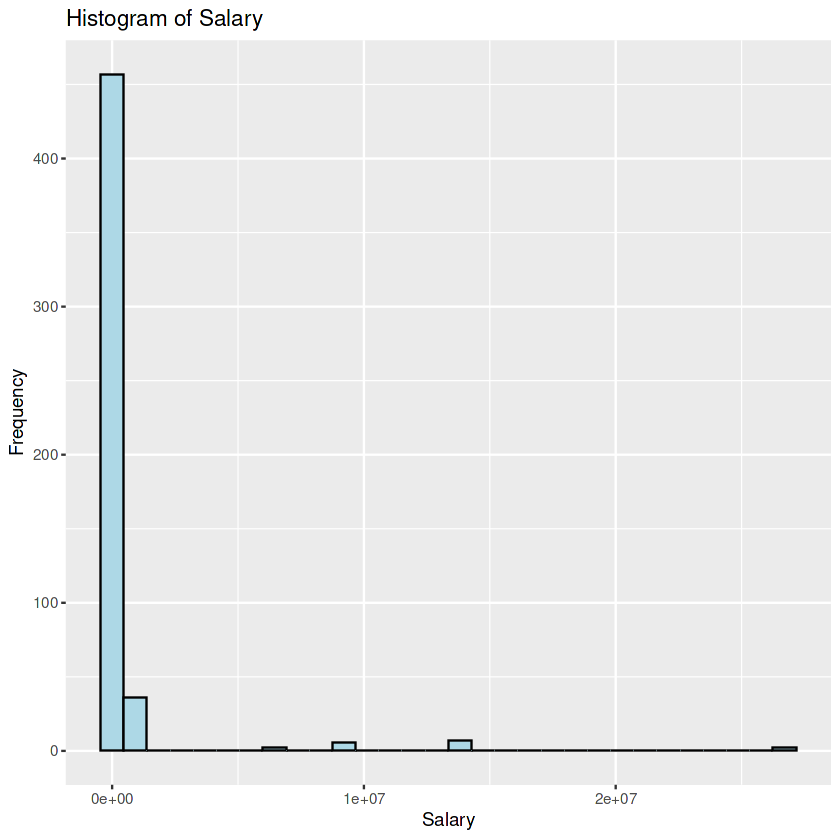

[1] "Names of high salary people:"
 [1]  64  96 107 111 135 178 181 185 200 205 244 310 349 380 382 387 399 424 432
[20] 446


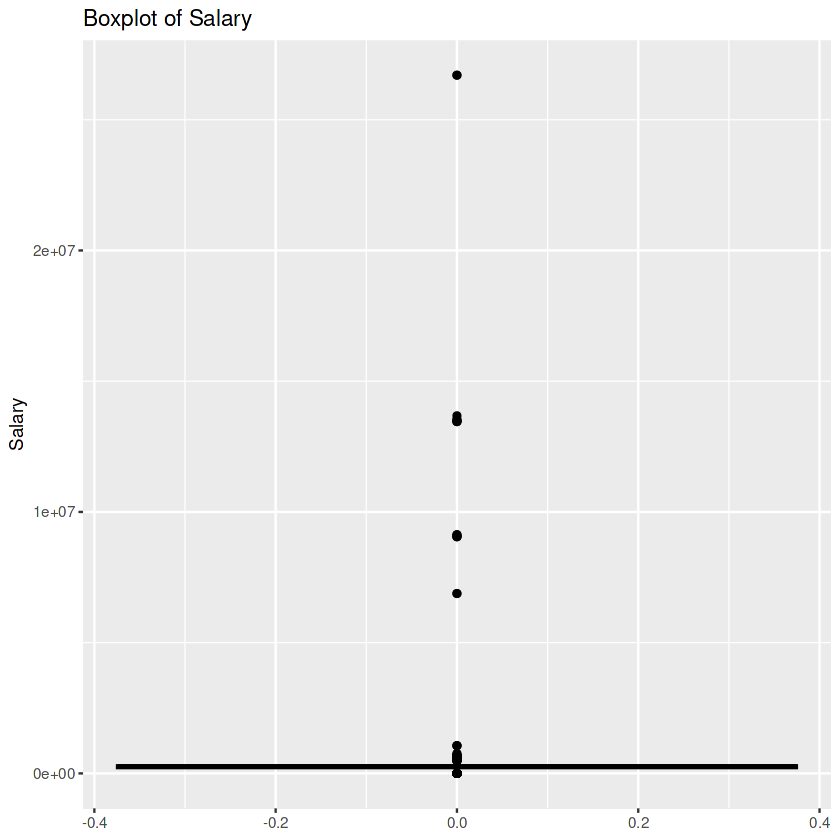

In [4]:
# Histogram
ggplot(enron, aes(x = salary)) +
  geom_histogram(fill = "lightblue", color = "black") +
  labs(x = "Salary", y = "Frequency", title = "Histogram of Salary")

# Boxplot
ggplot(enron, aes(y = salary)) +
  geom_boxplot(fill = "lightblue", color = "black") +
  labs(y = "Salary", title = "Boxplot of Salary")

print("Names of high salary people:")
leaders = subset(enron, enron$salary > 9e5)
print(leaders$X)

# Record candidate outliers.
outliers   = leaders
outliers_uni_S = outliers

## Exercised Stock Options

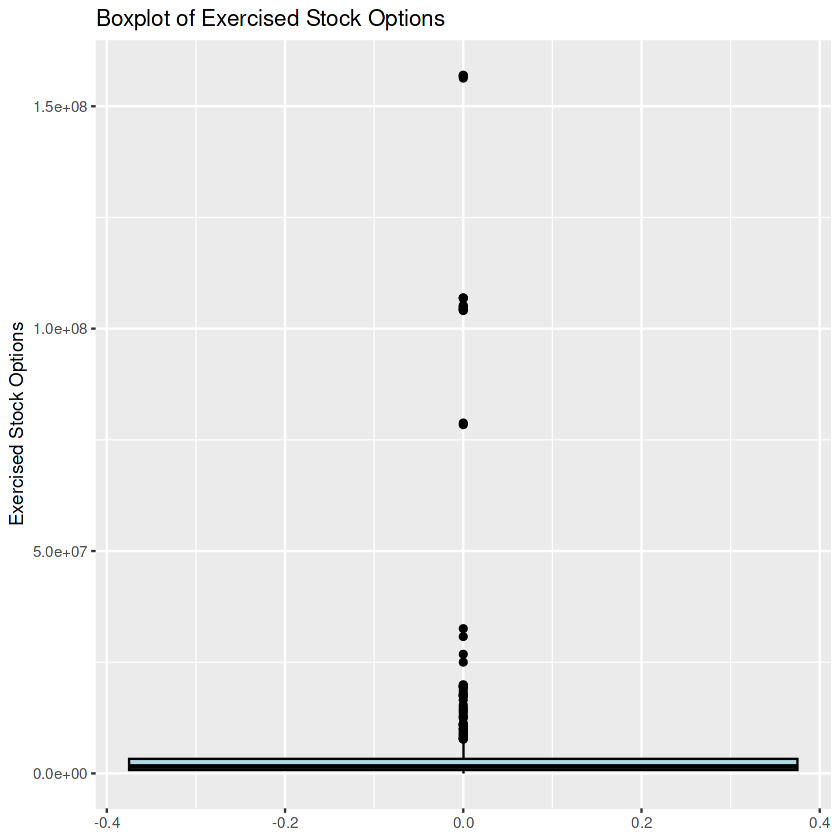

[1] "Names of people exercising stock options much more than others:"
  [1]   0   2   3   4   9  12  13  14  15  16  17  18  19  20  21  22  23  25
 [19]  29  30  31  32  33  34  35  36  38  41  43  45  46  48  50  51  52  56
 [37]  57  58  60  62  64  65  73  75  96 107 111 123 135 162 178 181 184 185
 [55] 187 190 198 200 202 205 206 212 234 237 241 244 251 267 279 300 302 303
 [73] 305 308 310 316 321 326 328 331 349 376 380 382 386 387 399 400 404 418
 [91] 420 432 446 447 450 463 465 470 477 500 501 502


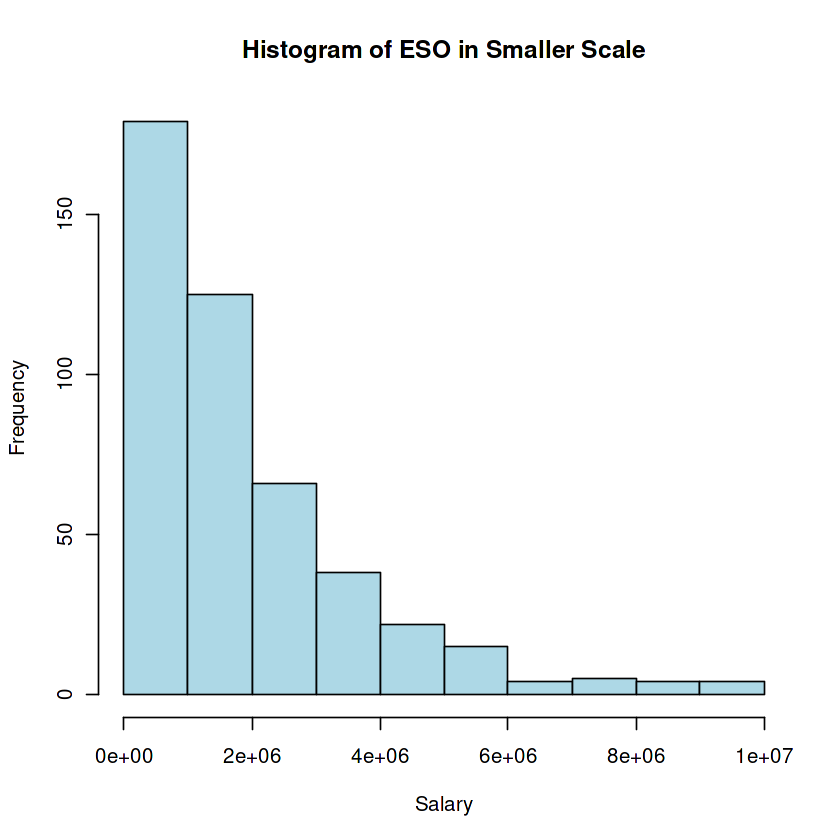

In [5]:
# Boxplot
ggplot(enron, aes(y = exercised_stock_options)) +
  geom_boxplot(fill = "lightblue", color = "black") +
  labs(y = "Exercised Stock Options", title = "Boxplot of Exercised Stock Options")

# Plot the histogram on a smaller scale to get a more precise observation.
hist(enron$exercised_stock_options[enron$exercised_stock_options < 1e7],
     main = "Histogram of ESO in Smaller Scale",
     xlab = "Salary",
     ylab = "Frequency",
     col = "lightblue")

print("Names of people exercising stock options much more than others:")
unusual_trader = subset(enron, enron$exercised_stock_options > 4e6)
print(unusual_trader$X)

# Record candidate outliers.
outliers_uni_ESO  = unusual_trader
outliers_bi_SnESO = merge(outliers_uni_S, unusual_trader, all = "True")
outliers_multi    = merge(outliers_uni_S, unusual_trader)

## Bonus

[1] "Names of people receiving bonus much more than others:"
 [1]   0   2   4  13  15  18  19  25  28  29  30  33  34  38  41  43  46  48  51
[20]  52  54  55  56  57  58  64  66  71  90  96 107 112 120 127 135 139 145 178
[39] 181 183 185 187 188 195 200 205 208 218 240 244 259 283 286 300 310 325 329
[58] 330 332 342 349 358 378 380 387 391 394 398 399 421 431 432 446 477 479


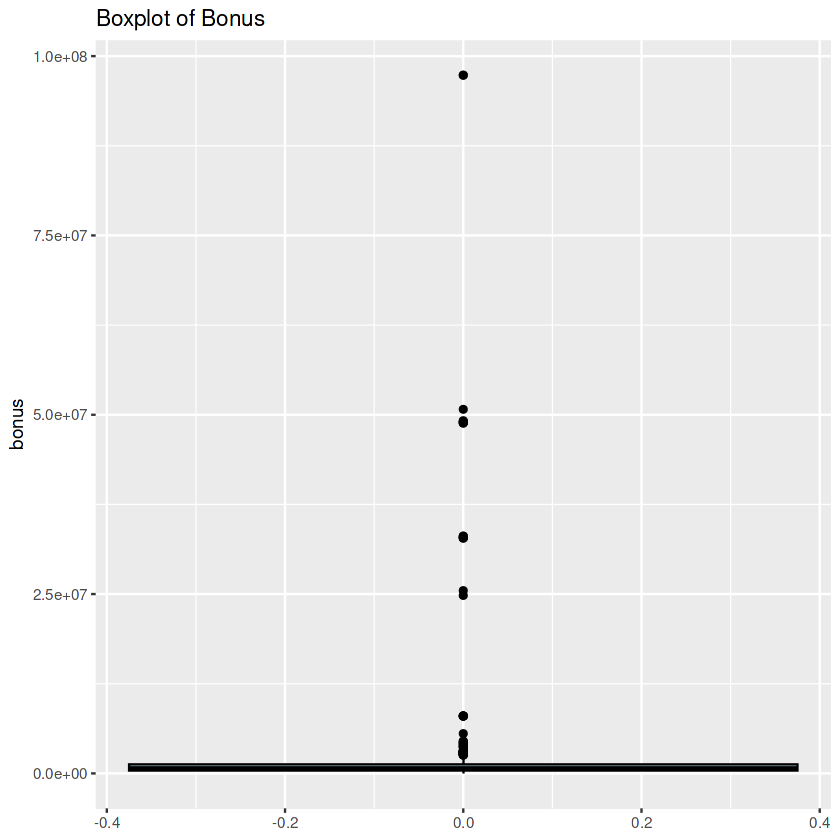

In [6]:
# Boxplot
ggplot(enron, aes(y = bonus)) +
  geom_boxplot(fill = "lightblue", color = "black") +
  labs(y = "bonus", title = "Boxplot of Bonus")
print("Names of people receiving bonus much more than others:")
unusual_bonus_receiver = subset(enron, enron$bonus > 2e6)
print(unusual_bonus_receiver$X)

# Record candidate outliers.
outliers_uni_B  = unusual_bonus_receiver
outliers_bi_SnB = merge(outliers_uni_S, unusual_bonus_receiver, all = "True")
outliers_multi  = merge(outliers_multi, unusual_bonus_receiver)

# Bivariate Analysis

[1] "Names of people ranking high however exercising stock options unusually:"
 [1]  64  96 107 135 178 181 185 200 205 244 310 349 380 387 399 432 446
[1] "Names of people exercising stock options unusually:"
 [1]   3   4  12  15  18  20  21  22  31  33  38  43  46  48  50  51  57  64  96
[20] 107 135 178 181 185 200 205 212 244 310 349 380 387 399 432 446


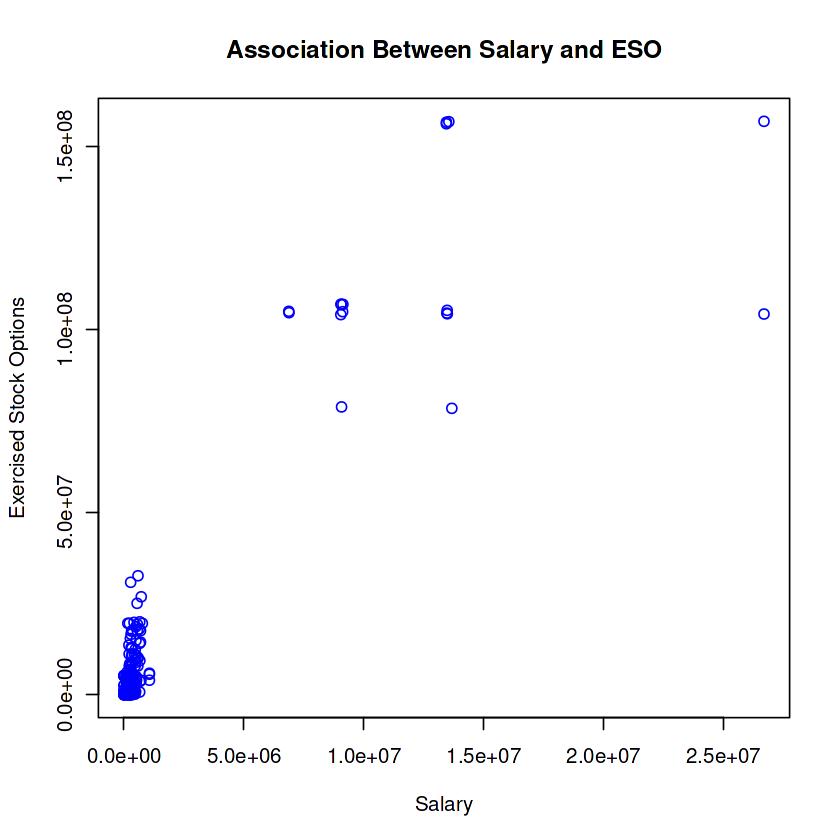

In [7]:
# Scatter of Salary and Exercised Stock Options
plot(enron$salary, enron$exercised_stock_options,
     main = "Association Between Salary and ESO",
     xlab = "Salary",
     ylab = "Exercised Stock Options",
     col = "blue")

print("Names of people ranking high however exercising stock options unusually:")
poi_leader = subset(enron, (enron$salary > 9e5 & enron$exercised_stock_options >= 1.5e7))
print(poi_leader$X)

print("Names of people exercising stock options unusually:")
poi_trader = subset(enron, enron$exercised_stock_options >= 1.5e7)
print(poi_trader$X)

# Record candidate outliers.
outliers_bi_SnESO = merge(outliers_bi_SnESO, poi_leader)
outliers_multi    = merge(outliers_multi, poi_leader)

[1] "Names of people receiving bonus over 10 times of their salary:"
 [1] 139 187 188 195 259 329 398 421 477 479
[1] "Names of people receiving unusually numerous bonus:"
 [1]  29  46  58  64  96 107 135 139 178 181 185 187 188 195 200 205 244 259 310
[20] 329 349 380 387 398 399 421 432 446 477 479


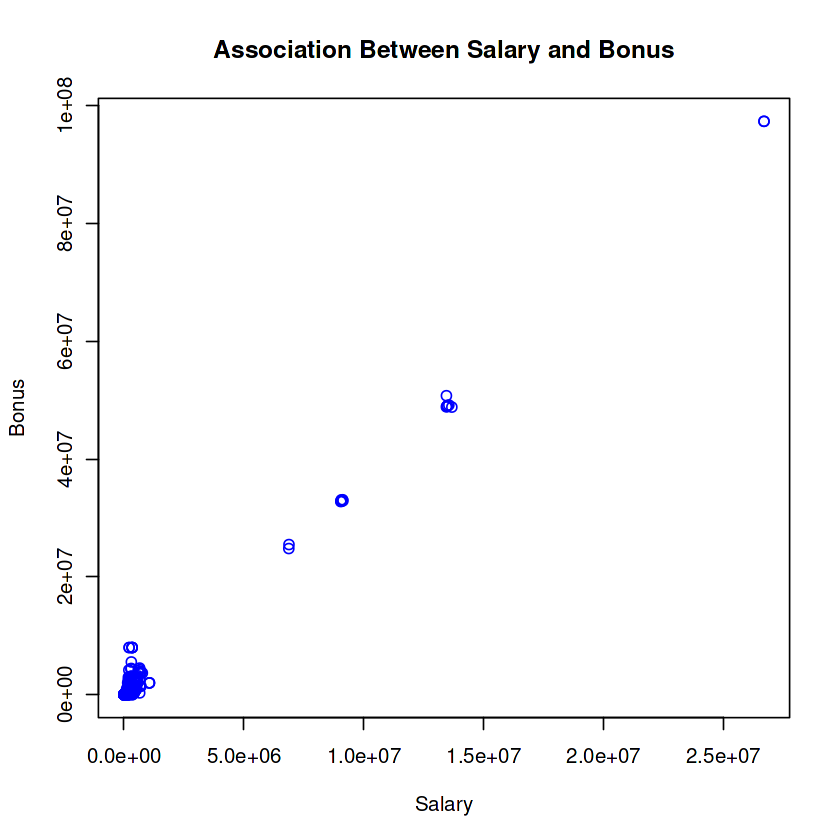

In [8]:
# Scatter of Salary and Bonus
plot(enron$salary, enron$bonus,
     main = "Association Between Salary and Bonus",
     xlab = "Salary",
     ylab = "Bonus",
     col = "blue")

print("Names of people receiving bonus over 10 times of their salary:")
unusual_bonus_emploee = subset(enron, enron$salary < 4e5 & enron$bonus >= 4e6)
print(unusual_bonus_emploee$X)

print("Names of people receiving unusually numerous bonus:")
poi_bonus_receiver = subset(enron, enron$bonus >= 4e6)
print(poi_bonus_receiver$X)

# Record candidate outliers.
outliers_uni_B  = merge(outliers_uni_B, unusual_bonus_emploee, all = "True")
outliers_bi_SnB = merge(outliers_bi_SnB, poi_bonus_receiver)
outliers_multi  = merge(outliers_multi, poi_bonus_receiver)

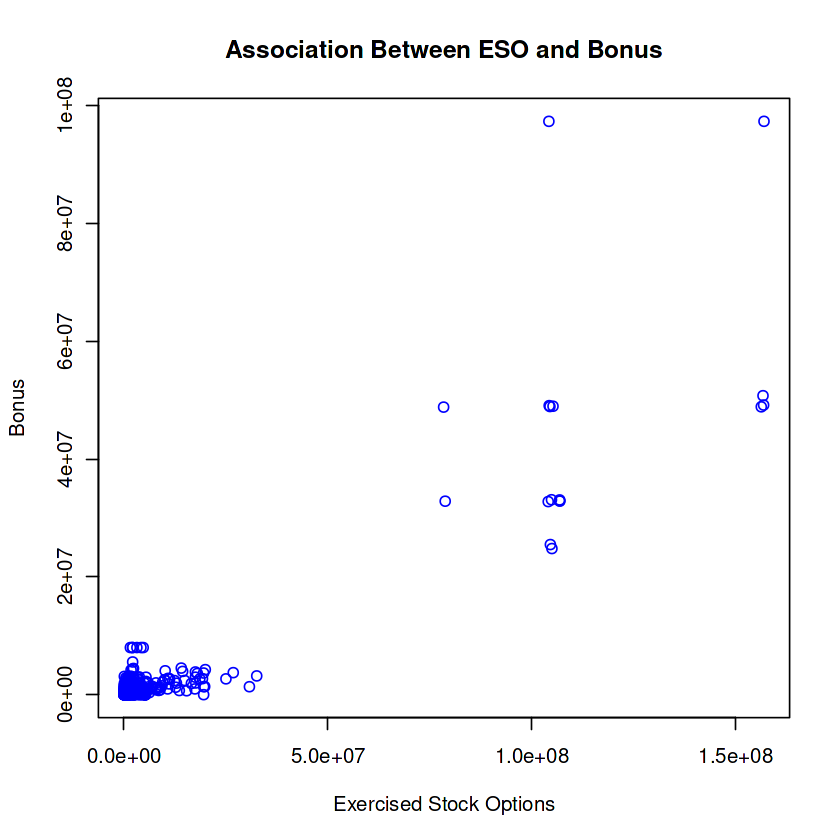

In [9]:
# Scatter of ESO and Bonus
plot(enron$exercised_stock_options, enron$bonus,
     main = "Association Between ESO and Bonus",
     xlab = "Exercised Stock Options",
     ylab = "Bonus",
     col = "blue")

# Multivariate Analysis

'data.frame':	510 obs. of  21 variables:
 $ X                        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ salary                   : num  255620 313464 553798 417912 546663 ...
 $ to_messages              : num  2069 2104 2866 1398 2661 ...
 $ deferral_payments        : num  0 214678 0 0 18934 ...
 $ total_payments           : num  1798987 2592112 3969811 1186904 2975862 ...
 $ loan_advances            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ bonus                    : num  2250000 1375000 2516667 1375000 2683333 ...
 $ restricted_stock_deferred: num  0 0 0 0 0 0 0 0 0 0 ...
 $ deferred_income          : num  -3117011 -167500 -262500 -1869693 -203281 ...
 $ total_stock_value        : num  7296695 2255061 9379918 12522301 14421001 ...
 $ expenses                 : num  58053 67063 64057 38812 39912 ...
 $ from_poi_to_this_person  : num  49 53 113 50 176 ...
 $ exercised_stock_options  : num  5379222 1963176 9960868 19794175 25008032 ...
 $ from_messages            : num  1550.5 1066.7 104.3 33.5 

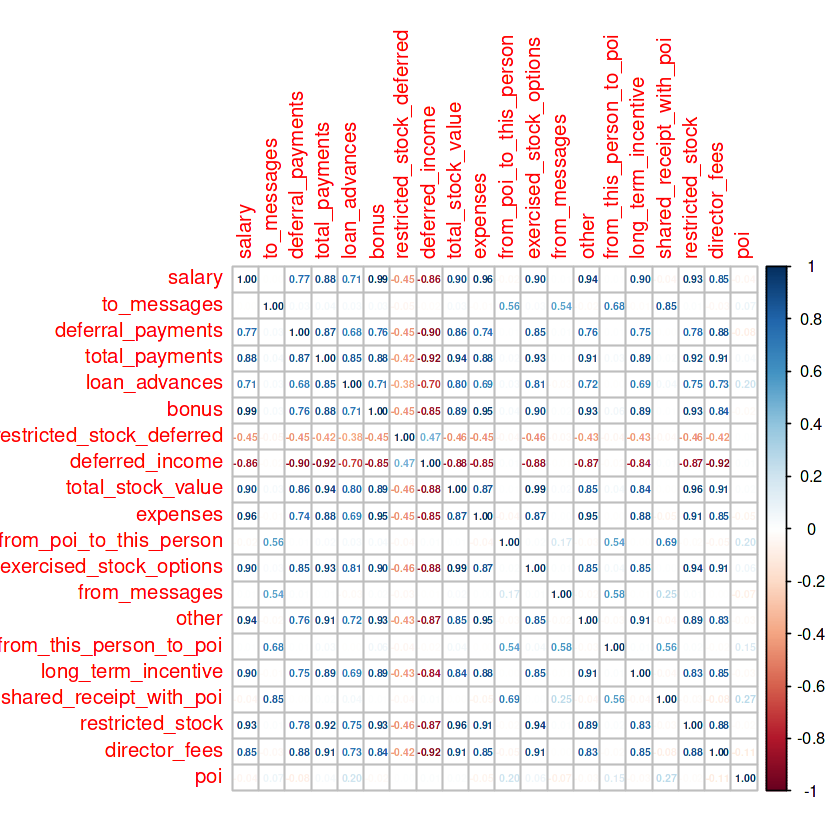

In [10]:
# Figure out the non-numeric variables and process them appropriately.

# Print the data structure of ENRON dataset
str(enron)

# Remove Name and Email_address elements, 
# and transform poi data from character to numeric type.
# enron_mat = select(enron, -c(X, email_address)) %>%
enron_mat = select(enron, -c(X)) %>%
            mutate(poi = ifelse(poi == "True",1.0,0.0)) %>%
            cor()

# Plot correlations among selected attributes
corrplot(enron_mat,method="number", number.cex = 0.5)

# Outlier Analysis

[1] "Names of multivariate outliers:"
 [1] 107 135 178 181 185 200 205 244 310 349 380 387 399 432 446  64  96
[1] "Names of outstanding emploees:"
 [1]  64  66  71  90  96 107 112 120 127 135 139 145 178 181 183 185 187 188 195
[20] 200 205 208 218 240 244 259 283 286 300 310 325 329 330 332 342 349 358 378
[39] 380 387 391 394 398 399 421 431 432 446 477 479
[1] enron.X                       enron.salary                 
[3] enron.bonus                   enron.exercised_stock_options
<0 rows> (or 0-length row.names)


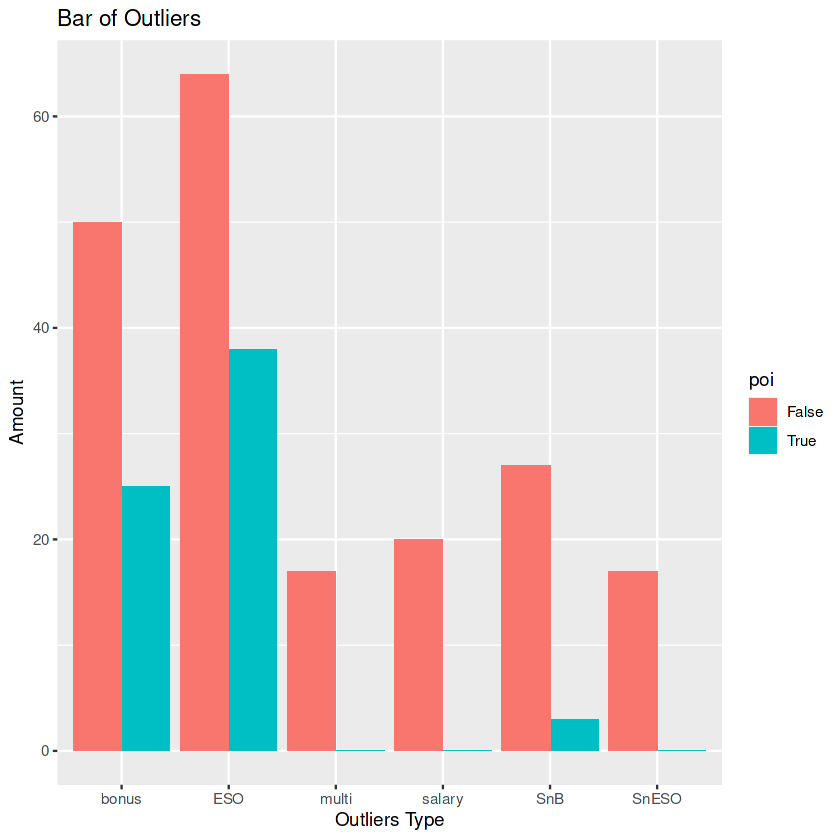

In [11]:
outlier_set = data.frame(
                var = c(rep("salary", each = 2), 
                        rep("ESO", each = 2), 
                        rep("bonus", each = 2), 
                        rep("SnESO", each = 2), 
                        rep("SnB", each = 2), 
                        rep("multi", each = 2)),
                value = c(length(outliers_uni_S$poi[outliers_uni_S$poi == "True"]),
                          length(outliers_uni_S$poi[outliers_uni_S$poi == "False"]),
                          length(outliers_uni_ESO$poi[outliers_uni_ESO$poi == "True"]),
                          length(outliers_uni_ESO$poi[outliers_uni_ESO$poi == "False"]),
                          length(outliers_uni_B$poi[outliers_uni_B$poi == "True"]),
                          length(outliers_uni_B$poi[outliers_uni_B$poi == "False"]),
                          length(outliers_bi_SnESO$poi[outliers_bi_SnESO == "True"]),
                          length(outliers_bi_SnESO$poi[outliers_bi_SnESO == "False"]),
                          length(outliers_bi_SnB$poi[outliers_bi_SnB$poi == "True"]),
                          length(outliers_bi_SnB$poi[outliers_bi_SnB$poi == "False"]),
                          length(outliers_multi$poi[outliers_multi$poi == "True"]),
                          length(outliers_multi$poi[outliers_multi$poi == "False"])
                         ),
                poi = rep(c("True", "False"),6)
    )

ggplot(outlier_set,aes(x = var,y = value))+
    geom_bar(stat = 'identity',aes(fill = poi),position = position_dodge(0.9)) +
    labs(x = "Outliers Type", y = "Amount", title = "Bar of Outliers")

print("Names of multivariate outliers:")
print(outliers_multi$X)
print("Names of outstanding emploees:")
print(outliers_uni_B$X[outliers_uni_B$poi == "False"])

# Special outlier
LJJ = subset(data.frame(enron$X, enron$salary, enron$bonus,enron$exercised_stock_options), 
            enron$X == "LAVORATO JOHN J")
print(LJJ)